# The sparks foundation (Data science and Business analytics internship)

# GRIP(sep 2022 )-Task 3 :- Exploratory Data Analysis - Retail

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you can derive by exploring the data?

# Auther : yasmeen sharaan

# Importing libraries

In [2]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

# inspection data

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# to know if there any empty cell
data.info()

# another methods 
#data.isna().any()
#data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


so the data doesn't have any empty value

In [8]:
data[['Sales','Quantity','Discount','Profit']].describe().round(4)

,Sales,Quantity,Discount,Profit
count,9994.0000,9994.0000,9994.0000,9994.0000
mean,229.8580,3.7896,0.1562,28.6569
std,623.2451,2.2251,0.2065,234.2601
min,0.4440,1.0000,0.0000,-6599.9780
25%,17.2800,2.0000,0.0000,1.7288
50%,54.4900,3.0000,0.2000,8.6665
75%,209.9400,5.0000,0.2000,29.3640
max,22638.4800,14.0000,0.8000,8399.9760


In [28]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [19]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [61]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [62]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

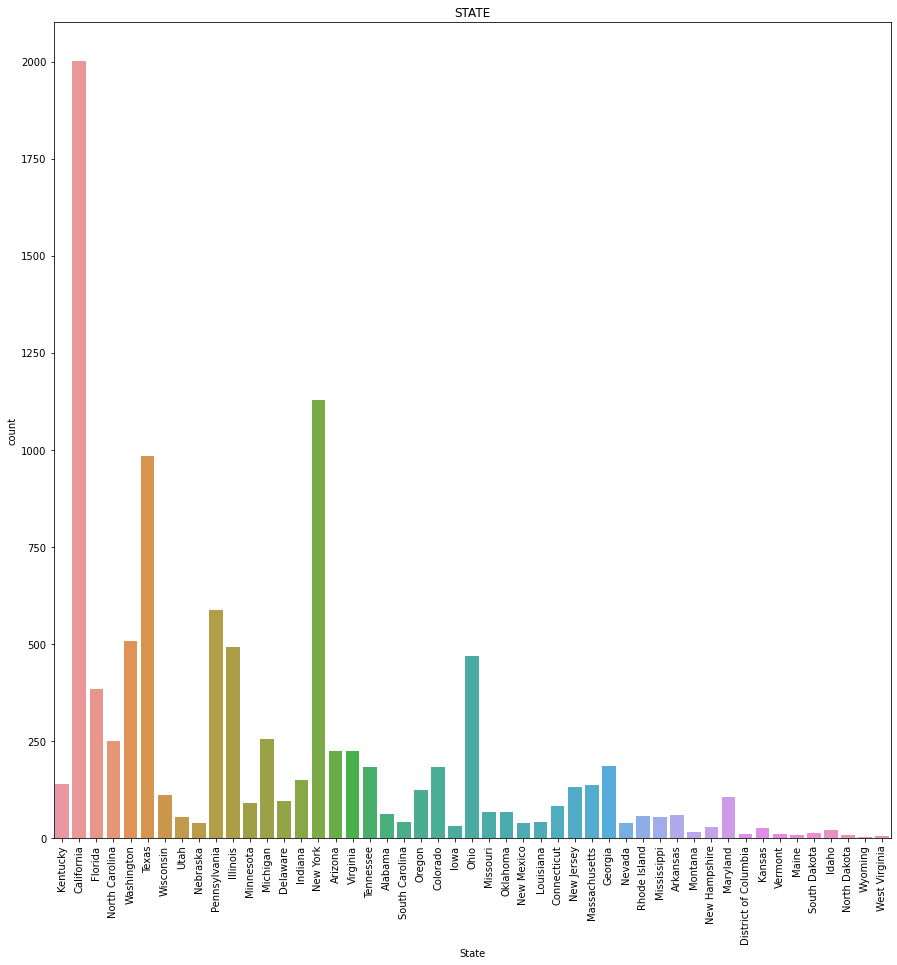

In [52]:
plt.figure(figsize=(15,15))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

In [16]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [18]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<AxesSubplot:>

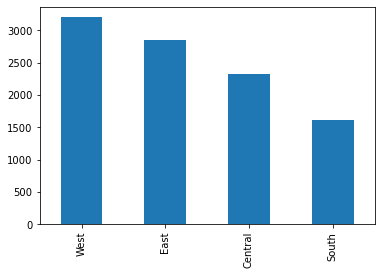

In [24]:
data['Region'].value_counts().plot.bar()

In [36]:
data_test = data[['Ship Mode','Region','Profit']]

In [48]:
data_test.groupby(['Ship Mode','Region'],as_index=False).sum()['Profit'].nlargest()

13    57023.2081
15    54760.9657
14    26952.2330
12    25352.3807
11    22877.3628
Name: Profit, dtype: float64

In [20]:
# Chaecking the dupilication in data
data.duplicated().sum()

17

In [21]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [22]:
data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4225,Standard Class,Corporate,United States,Chicago,Illinois,60623,Central,Furniture,Furnishings,94.428,3,0.6,-42.4926
5952,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Office Supplies,Paper,20.736,4,0.2,7.2576
200,Standard Class,Consumer,United States,Akron,Ohio,44312,East,Office Supplies,Paper,21.744,3,0.2,6.7950
7987,Standard Class,Home Office,United States,Sheboygan,Wisconsin,53081,Central,Office Supplies,Labels,25.200,4,0.0,11.5920
4016,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Paper,21.400,5,0.0,9.6300
7194,First Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,15.920,4,0.0,7.4824
2359,Standard Class,Corporate,United States,New York City,New York,10024,East,Furniture,Tables,613.908,3,0.4,-122.7816
407,Standard Class,Consumer,United States,San Francisco,California,94110,West,Office Supplies,Paper,27.150,5,0.0,13.3035
6191,Same Day,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Storage,31.440,3,0.0,8.4888
5551,Standard Class,Corporate,United States,Houston,Texas,77036,Central,Office Supplies,Supplies,16.656,6,0.2,-3.1230


In [53]:
# Count the total repeatable states
total_repeatable_states = data['State'].value_counts()
top_10 = total_repeatable_states.head(10)
top_10

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

<AxesSubplot:>

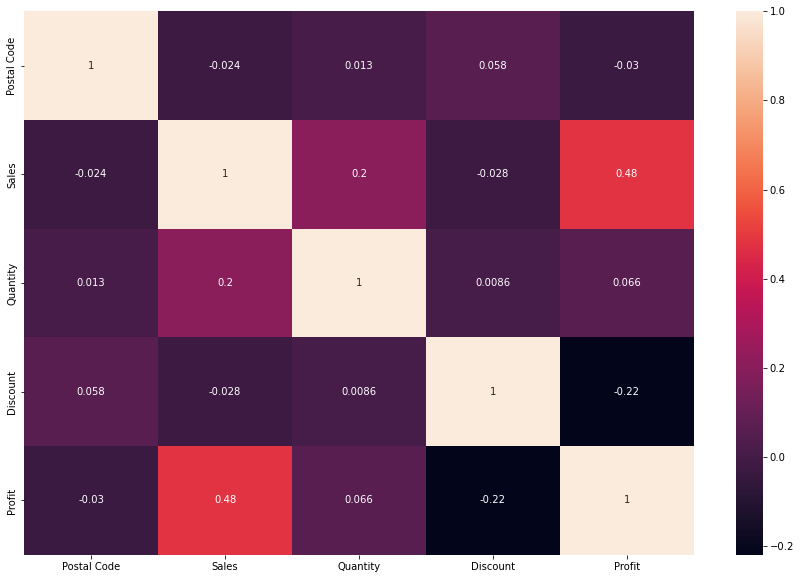

In [54]:
corr= data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [63]:
data.to_csv("SampleSuperstore1.csv")